# Utility notebook to plot profile of a single bead

In [35]:
import os
import numpy as np
import json
from skimage.io import imread
from skimage.io import imsave
%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib.colors import ListedColormap

from cmcrameri import cm
import pandas
import warnings
import time

In [99]:
def plot_profile(dist,
                 val,
                 size=None,
                 save_path='./profile.svg',
                 hlim=[],
                 vlim=[],
                 save_plot=True,
                 h_label='',
                 v_label='',
                 color='black',
                 l_margin=None,
                 r_margin=None,
                 t_margin=None,
                 b_margin=None):
    

    # plot data
    fig, ax = plt.subplots(figsize=size)
    plt.stairs(val,edges=dist,fill=True,color=color)
    
    # update labels
    if h_label == '':
        h_label = 'Distance (μm)'
    plt.xlabel(h_label)
    
    if v_label == '':
        v_label = 'Detector counts'
    plt.ylabel(v_label)
    
    if hlim != []:
        plt.xlim(hlim)
    if vlim != []:
        plt.ylim(vlim)
        
    plt.subplots_adjust(left=l_margin, right=r_margin, top=t_margin, bottom=b_margin)
    
    # save plot
    if save_plot:
        print('Saving plot')
        plt.savefig(save_path)
    else:
        print('Plot NOT saved!')
    
    return fig, ax


In [104]:
# opening the CSV file
data_path = 'C:\\Users\\AERB\\Documents\\Kevin\\Nature Protocols\\Bead phantom'
data_name = 'bead_profile_x2_raw.csv'
 
# reading the CSV file
csvFile = pandas.read_csv(os.path.join(data_path,data_name),header=0,encoding= 'unicode_escape')
 
# displaying the contents of the CSV file
csvFile.head()

,Distance_(µm),Gray_Value
0,0.00000,130
1,0.24540,126
2,0.49080,130
3,0.73621,203
4,0.98161,467


In [105]:
dist = csvFile['Distance_(µm)'].values
sampling = np.abs(dist[1] - dist[0])
dist=np.append(dist,dist[-1]+sampling)
dist -= sampling/2
val = csvFile['Gray_Value'].values

In [74]:
# run this line regardless to reset any prior styles
plt.style.use('default')

# run this line for inline display
#plt.style.use('../styles/display.mplstyle')

# run this line to save for paper display

plt.style.use('../styles/nat_prot_heat.mplstyle')

<IPython.core.display.Javascript object>


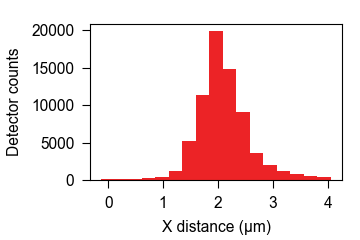

Saving plot


(<Figure size 180x120 with 1 Axes>,
 <Axes: xlabel='X distance (µm)', ylabel='Detector counts'>)

In [106]:
fiji_yellow = '#FFCA0B'
fiji_red = '#EC2326'
save_name = 'X_profile.pdf'
plot_profile(dist,
             val,
             size=(2.25,1.5),
             h_label='X distance (µm)',
             save_path=os.path.join(data_path,save_name),
             color=fiji_red,
             save_plot=True,
             l_margin=0.25,
             b_margin=0.25
            )
